In [4]:
#imports
import numpy as np
import numpy.random as rd
import numpy.linalg as linalg
import math
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [5]:
def sample(prob): # BS can be done
    r = rd.random();i = 0
    while r > prob[i]:
        r-=prob[i]
        i+=1
    return i

def bernoulli(prob):
    if rd.random() > prob:
        return 1.0
    return 0.0

def row_normalize(arr):
    arr = np.array(arr,float)
    for i in range(np.shape(arr)[0]):
        arr[i] = arr[i]/np.sum(arr[i])
    return arr

def normalize(arr):
    arr = np.array(arr,float)
    return arr/np.sum(arr)

def dot(x,y):
    return np.sum(np.multiply(x,y))

def steady_state_prob(matrix):
    """
    This function calculates relative throughput from a probability matrix
    :param matrix: the probability matrix
    :return: A list of relative throughput values
    """
    a_list = []
    b_list = []
    for v in matrix:
        a_list.append(1)
        b_list.append(0)
    b_list.append(1)
    A = np.append(np.transpose(matrix) - np.identity(len(matrix)), [a_list], axis=0)
    b = np.transpose(np.array(b_list))
    return np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

In [ ]:
en = 3
ch = 3
P = np.array([.2,.4,.4])
E = np.array([[.5,.6,.4],[.2,.3,.1],[.4,.5,.3]])
# E = np.array([[.6,.9,.3],[.3,.5,.1],[.4,.1,.05]])
R = np.array([8.,6.,4.])
# P = row_normalize([np.random.rand(ch)/2])[0]
# E = np.random.rand(en,ch)/2
# R = np.array([np.random.randint(1,10) for i in range(en)])
tol = .3
print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

In [ ]:
# example 2
en = 12
ch = 10
P = np.array([.3,.1,.15,.35,.2,.1,.25,.2,.1,.25])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4,.4,.3],[.3,.4,.4,.3,.3,.35,.25,.4,.4,.25],[.3,.2,.1,.4,.3,.4,.4,.3,.35,.55],[.45,.5,.4,.55,.7,.45,.55,.35,.35,.55],[.2,.4,.1,.3,.4,.4,.3,.1,.1,.3],[.4,.6,.4,.3,.6,.4,.3,.1,.25,.4],[.4,.6,.4,.3,.1,.35,.3,.4,.1,.3],[.55,.45,.45,.3,.3,.35,.25,.4,.4,.1],[.3,.2,.1,.4,.3,.4,.4,.3,.2,.4],[.4,.3,.3,.5,.6,.4,.4,.35,.4,.6],[.2,.4,.1,.3,.4,.4,.3,.1,.4,.25],[.4,.6,.4,.3,.6,.4,.3,.1,.3,.4]])/2
R = np.array([4.,3.5,4.,8,2.,3.,4.,3.5,4.,6.,2.,3.])
tol = .2
print(P)
print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

In [3]:
# example 2
en = 6
ch = 8
P = np.array([.3,.1,.2,.4,.3,.1,.3,.3])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4],[.3,.4,.4,.3,.3,.35,.25,.4],[.3,.2,.1,.4,.3,.4,.4,.3],[.4,.3,.3,.5,.6,.4,.55,.35],[.2,.4,.1,.3,.4,.4,.3,.1],[.4,.6,.4,.3,.6,.4,.3,.1]])/2
R = np.array([4.,3.5,4.,8.,2.,3.])
tol = .2
print(P)
print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[0.15 0.05 0.1  0.2  0.15 0.05 0.15 0.15]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2  ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2  ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15 ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.275 0.175]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05 ]]
[4.  3.5 4.  8.  2.  3. ]
0.13


In [10]:
# random example generator
en = 15
ch = 20
P = normalize(rd.rand(ch))
E = rd.rand(en,ch)/2
R = np.array(rd.randint(low=1,high=2*en,size=en),float)
# print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[14. 11.  2. 12. 27. 26. 21. 22.  2. 13. 27.  9.  6. 14. 27.]
0.20039365150856003


In [11]:
tol = .25
ltemp = linprog(c = -1*R, A_ub = [ub], b_ub = [tol],A_eq = np.ones((1,en)),b_eq = [1.0],method='simplex')
print(tol)
print(dot(ltemp.x,R), np.sum(ltemp.x),ltemp.con, ltemp.success, dot(ltemp.x,ub))
org_x = ltemp.x
print(ltemp.x)

0.25
26.4391733024935 1.0 [0.] True 0.25
[0.        0.        0.        0.        0.        0.5608267 0.
 0.        0.        0.        0.        0.        0.        0.
 0.4391733]


In [13]:
xub = E.transpose();tol_arr = [tol]*ch
ltemp = linprog(c=np.zeros(en),A_ub = xub,b_ub=tol_arr,A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-3})
print(ltemp.success)
x0 = np.transpose(row_normalize([ltemp.x])) # noise to safe to avoid singular matrices, 1.0e-2 is working
norm_x0 = linalg.norm(x0)
e0 = x0/norm_x0 # safe vector
e0_trans = e0.transpose()
en0 = sample(x0.transpose()[0])
c_arr = []
for i in range(500):
    c_arr.append(1.0-bernoulli(E[sample(x0)][sample(P)]))
c0 = np.mean(c_arr)
print(np.sum(x0))
print(x0.flatten())
print(c0,dot(x0.flatten(),R))

False
0.9999999999999999
[0.         0.23057669 0.06133575 0.         0.         0.06774423
 0.23193312 0.13296245 0.         0.17899306 0.01048825 0.
 0.         0.         0.08596645]
0.24 17.147321137030378


In [14]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.001 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)];c = [c0]
b = []; enc = [];chnl = []
avg_rate = []

In [15]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
for t in range(1,10000):
    enc.append(sample(x[-1].transpose()[0]))
    chnl.append(sample(P))
    b.append(bernoulli(E[enc[-1]][chnl[-1]]))
    yt = (E[enc[-1]]*(1-b[-1]))+((1-E[enc[-1]])*b[-1])
    yt = row_normalize([np.exp(yt)]).transpose()
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])  # c.append(dot(x[-1],np.matmul(E,yt)))
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c[0]/norm_x0)*e0_trans)+muopt.transpose()+(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    val = alfa_c*betat*linalg.norm(xopt)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub, b_ub = [tol-val],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose([ltemp.x]))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,avg_rate[-1],1.0-np.mean(b),ltemp.success,end='\n')
    # print(val,alfa_c*betat*linalg.norm(x[-1] - (dot(x[-1],e0)*e0)))
# print(copt)
# print(xopt)
# print(sigopt)
# print(uopt)
# print(muopt)
# print(ub,betat)

1 27.0 True 1.1985246062073852e-19 0.004189211112224255
2 27.0 True 0.005849842342166262 0.005849842342166262
3 27.000000000000004 True 0.0062182011157540925 0.004396328234462222
4 27.000000000000004 True 0.0045456219002478725 0.004985379096736654
5 27.000000000000004 True 0.005099516509665969 0.005415724836375166
6 26.999999999999996 True 0.005508403779222702 0.00488743951537893
7 27.000000000000004 True 0.004953830399729619 0.0051204960407165235
8 27.000000000000004 True 0.005177932483335613 0.005310955662220944
9 27.000000000000004 True 0.005361542034484012 0.005048934163406914
10 27.000000000000004 True 0.005090630094483983 0.005186259365834358
11 27.0 True 0.005223998132789263 0.005011865812338356
12 27.0 True 0.0050444163975882665 0.005109953443961925
13 26.999999999999996 True 0.005139887164277769 0.0051986896568837005
14 27.000000000000004 True 0.005226398119378205 0.005279451008919065
15 27.000000000000004 True 0.0053052429114539825 0.005354323634619176
16 27.0 True 0.00537845

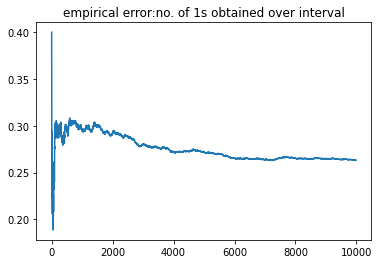

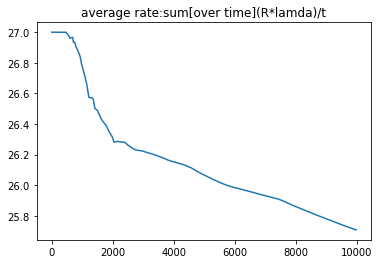

In [16]:
stat = 10
end = 10000
error_plot = 1.0 - np.copy(b)
rate_plot = np.copy(avg_rate)
for i in range(1,len(error_plot)):
    error_plot[i] += (error_plot[i-1]*(i-1))
    error_plot[i] =error_plot[i]/i
plt.plot(error_plot[stat:end])
plt.title('empirical error:no. of 1s obtained over interval')
plt.show()
for i in range(1,len(rate_plot)):
    rate_plot[i] += (rate_plot[i-1]*(i-1))
    rate_plot[i] =rate_plot[i]/i
plt.plot(rate_plot[stat:end])
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [19]:
print(x0.flatten())
print('--------------------------------------------------------------------------')
print(x[end-2].flatten())
print(org_x)
print(error_plot[end-2],tol)
print(avg_rate[end-2],dot(org_x,R))

[0.         0.23057669 0.06133575 0.         0.         0.06774423
 0.23193312 0.13296245 0.         0.17899306 0.01048825 0.
 0.         0.         0.08596645]
--------------------------------------------------------------------------
[0.         0.         0.         0.         0.         0.
 0.         0.39297973 0.         0.         0.         0.
 0.         0.         0.60702027]
[0.        0.        0.        0.        0.        0.5608267 0.
 0.        0.        0.        0.        0.        0.        0.
 0.4391733]
0.2633526705341076 0.25
25.035800277829537 26.4391733024935


26.816820552879438


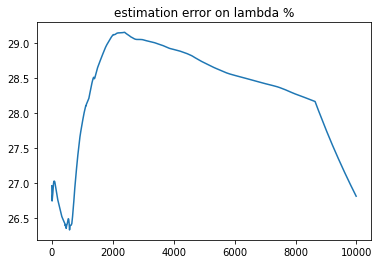

In [18]:
err = []
for i in range(len(x)):
    err.append(np.sqrt(np.sum(np.square(org_x-x[i].flatten()))/en)*100)
    err[i] += (err[i-1]*(i))
    err[i] = err[i]/(i+1)
print(err[-1])
plt.plot(err[stat:end])
plt.title('estimation error on lambda %')
plt.show()

In [ ]:
# Rough

In [ ]:
(Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/.1)/0.9))+math.sqrt(.1)*Sa)*linalg.norm(xopt) 

In [ ]:
alfa_c -> lamda error %
0.0 -> 0.7263980978187543
0.0001 -> 0.64
0.001 -> 0.17
0.005 -> 4